# TA session #02

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
plt.style.use('seaborn-white')

In [36]:
## Load dataset(Hitters.csv) and drop NA(null) rows.
data = pd.read_csv('Data/Hitters.csv', index_col=0)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [37]:
output = 'Salary'

In [38]:
data = data.dropna(how='any')
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [39]:
## Convert object-type variables to integer(float)-type variables (Generate dummy variables)
data = pd.get_dummies(data, columns=['League', 'Division','NewLeague'])

In [40]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.0,1,0,0,1,1,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 23 columns):
AtBat          263 non-null int64
Hits           263 non-null int64
HmRun          263 non-null int64
Runs           263 non-null int64
RBI            263 non-null int64
Walks          263 non-null int64
Years          263 non-null int64
CAtBat         263 non-null int64
CHits          263 non-null int64
CHmRun         263 non-null int64
CRuns          263 non-null int64
CRBI           263 non-null int64
CWalks         263 non-null int64
PutOuts        263 non-null int64
Assists        263 non-null int64
Errors         263 non-null int64
Salary         263 non-null float64
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(1), int64(16), uint8(6)
memory usage: 38.5+ KB


# 1. Regression: Random Forest

In [42]:
X = data.drop(['Salary'], axis=1)
y = data[['Salary']]

## Split train/test sets. (8:2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1008)


## Do proper normalization.

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

/home/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
X_train_scaled

array([[0.54191617, 0.45991561, 0.225     , ..., 0.        , 0.        ,
        1.        ],
       [0.28443114, 0.23206751, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.68263473, 0.52742616, 0.075     , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.35479042, 0.29113924, 0.325     , ..., 0.        , 1.        ,
        0.        ],
       [0.7245509 , 0.56962025, 0.125     , ..., 1.        , 0.        ,
        1.        ],
       [0.85329341, 0.71308017, 1.        , ..., 0.        , 1.        ,
        0.        ]])

/home/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


94644.03810920057

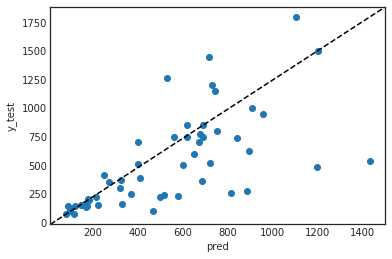

In [44]:
## Fit the model and plot the result. (x: predictions, y: truths)
## Data Scale 전
regr1 = RandomForestRegressor(max_features=19, random_state=1)
regr1.fit(X_train, y_train)
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)


mean_squared_error: 0.0162
r2_score: 0.4433


/home/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


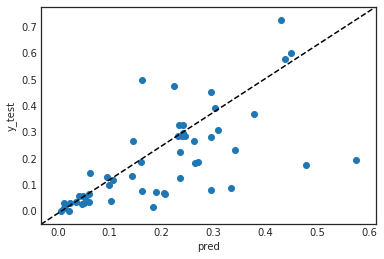

In [45]:
## Fit the model and plot the result. (x: predictions, y: truths)
## Data Scale 후 (min_Max_scaler)
regr1 = RandomForestRegressor(max_features=19, random_state=1)
regr1.fit(X_train_scaled , y_train_scaled )
pred1 = regr1.predict(X_test_scaled)

plt.scatter(pred1, y_test_scaled , label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
print('mean_squared_error: %.4f' %mean_squared_error(y_test_scaled , pred1))

from sklearn.metrics import r2_score
print('r2_score: %.4f' %r2_score(y_test_scaled , pred1))


In [46]:
## Print the MSE result.
mean_squared_error(y_test_scaled , pred1)

0.016244171808782043

# 2. Classification: Random Forest

In [47]:
### Data Preparation ###

X = data.drop(['Salary'], axis=1)
threshold = np.median(data['Salary'])
y = (data['Salary'] > threshold).astype(int).values

## Split train/test sets. (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1008)

## Do proper normalization.
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [48]:
## Fit the model and plot the result. (x: predictions, y: truths)
ml = RandomForestClassifier( n_estimators=5, random_state=1)
ml.fit(X_train_scaled, y_train)
y_pred = ml.predict(X_test_scaled)


# X_combined= np.vstack((X_train_scaled, X_test_scaled))
# y_combined= np.hstack((y_train, y_test))
# plot_decision_region(X=X_combined, y=y_combined, classifier=ml, test_idx=range(105,150), title='scikit-learn 랜덤포레스트')

In [49]:
## Print the results. - Confusion matrix, Accuracy, Precision/Recall, F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('총 테스트 개수:%d, 오류개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred))
print('Precision: %.2f' %precision_score(y_test, y_pred))
print('Recall: %.2f' %recall_score(y_test, y_pred))
print('F1-score: %.2f' %f1_score(y_test, y_pred))
print('confusion_matrix:')
confusion_matrix(y_test, y_pred)

총 테스트 개수:53, 오류개수:10
Accuracy: 0.81
Precision: 0.76
Recall: 0.88
F1-score: 0.81
confusion_matrix:


array([[21,  7],
       [ 3, 22]])

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.88      0.75      0.81        28
     class 1       0.76      0.88      0.81        25

   micro avg       0.81      0.81      0.81        53
   macro avg       0.82      0.81      0.81        53
weighted avg       0.82      0.81      0.81        53



### 위 classification_report 결과에서
### 0이라고 예측한 데이터(salary가 425보다 작다고 예측한 데이터)의 88%만 실제로 작았고 
### 1이라고 예측한 데이터(salary가 425보다 크다고 예측한 데이터)의 76%가 실제로 컸음을 알 수 있다.
### 또한 실제 0인 데이터 중의 75%만 0으로 판별되었고 실제 1인 데이터 중의 88%만 1로 판별되었음을 알 수 있다.

In [51]:
#feature 변경
ml = RandomForestClassifier( n_estimators=22, random_state=1)
ml.fit(X_train_scaled, y_train)
y_pred = ml.predict(X_test_scaled)

In [52]:
## Print the results. - Confusion matrix, Accuracy, Precision/Recall, F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('총 테스트 개수:%d, 오류개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred))
print('Precision: %.2f' %precision_score(y_test, y_pred))
print('Recall: %.2f' %recall_score(y_test, y_pred))
print('F1-score: %.2f' %f1_score(y_test, y_pred))
print('confusion_matrix:[TP, FN, FP, TN ] =',confusion_matrix(y_test, y_pred).ravel())

print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

총 테스트 개수:53, 오류개수:7
Accuracy: 0.87
Precision: 0.80
Recall: 0.96
F1-score: 0.87
confusion_matrix:[TP, FN, FP, TN ] = [22  6  1 24]
              precision    recall  f1-score   support

     class 0       0.96      0.79      0.86        28
     class 1       0.80      0.96      0.87        25

   micro avg       0.87      0.87      0.87        53
   macro avg       0.88      0.87      0.87        53
weighted avg       0.88      0.87      0.87        53



### Random_forest의 hyperparameter인 n_estimators 값(feature 선택 수)을 변경하는데
### max_feature를 모두사용하는 22로 변경하면 bagging과 동일한 결과를 갖게 되며
### 전체 feature가 여러번 반영되기 때문에 모델의 예측력이 향상하게 된다.

# 3. Classification: SVM

In [53]:
## change h values depending on the coding speed...
def PlotSVMResult(svc, x, y, predictors, h=0.01):
    xx, yy = np.meshgrid(np.arange(-0.1, 1.1, h), np.arange(-0.1, 1.1, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    sv = svc.support_vectors_

    # plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#d8ebee', '#e7b7a3']))
    plt.scatter(x[:, 0], x[:, 1], s=50, c=y, cmap=plt.cm.Paired, label="Truth(Blue=Low)")
    plt.scatter(sv[:,0], sv[:,1], c='k', alpha=0.5, marker='*', s=30, label="Support Vectors")
    plt.legend()
    plt.xlabel(predictors[0])
    plt.ylabel(predictors[1])
    plt.show()

In [54]:
### Data Preparation ###
features= ['Assists', 'Errors']
X = data[features]
threshold = np.median(data['Salary'])
y = (data['Salary'] > threshold).astype(int).values

## Split train/test sets. (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1008)

## Do proper normalization.
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


/home/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


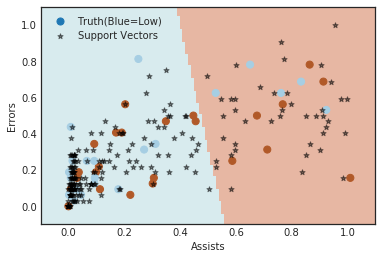

In [55]:
## Fit the model and plot the result. (x: predictor1, y: predictor2, color: predicted class)
svc = SVC(C= 5.0, kernel='linear')
svc.fit(X_train_scaled, y_train)

PlotSVMResult(svc, X_test_scaled, y_test, features, h=0.01)

In [56]:
## Print the results. - Confusion matrix, Accuracy, Precision/Recall, F1-score
y_pred = svc.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('총 테스트 개수:%d, 오류개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred))
print('Precision: %.2f' %precision_score(y_test, y_pred))
print('Recall: %.2f' %recall_score(y_test, y_pred))
print('F1-score: %.2f' %f1_score(y_test, y_pred))
print('confusion_matrix:[TP, FN, FP, TN ] =',confusion_matrix(y_test, y_pred).ravel())

print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

총 테스트 개수:53, 오류개수:23
Accuracy: 0.57
Precision: 0.58
Recall: 0.28
F1-score: 0.38
confusion_matrix:[TP, FN, FP, TN ] = [23  5 18  7]
              precision    recall  f1-score   support

     class 0       0.56      0.82      0.67        28
     class 1       0.58      0.28      0.38        25

   micro avg       0.57      0.57      0.57        53
   macro avg       0.57      0.55      0.52        53
weighted avg       0.57      0.57      0.53        53



/home/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


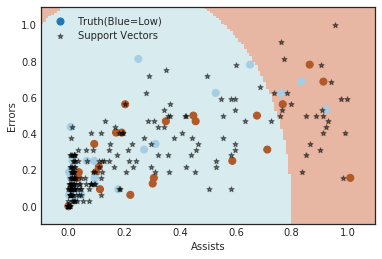

In [57]:
## Change the kernel type and compare the results.
svc = SVC(C= 5.0, kernel='rbf')
svc.fit(X_train_scaled, y_train)

PlotSVMResult(svc, X_test_scaled, y_test, features, h=0.01)

In [58]:
## Print the results. - Confusion matrix, Accuracy, Precision/Recall, F1-score
y_pred = svc.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('총 테스트 개수:%d, 오류개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred))
print('Precision: %.2f' %precision_score(y_test, y_pred))
print('Recall: %.2f' %recall_score(y_test, y_pred))
print('F1-score: %.2f' %f1_score(y_test, y_pred))
print('confusion_matrix:[TP, FN, FP, TN ] =',confusion_matrix(y_test, y_pred).ravel())

print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

총 테스트 개수:53, 오류개수:24
Accuracy: 0.55
Precision: 0.57
Recall: 0.16
F1-score: 0.25
confusion_matrix:[TP, FN, FP, TN ] = [25  3 21  4]
              precision    recall  f1-score   support

     class 0       0.54      0.89      0.68        28
     class 1       0.57      0.16      0.25        25

   micro avg       0.55      0.55      0.55        53
   macro avg       0.56      0.53      0.46        53
weighted avg       0.56      0.55      0.47        53



# 4. Grid Search with SVM (tuning HPs)

In [60]:
tuned_parameters = [{'C':[0.001, 0.01, 0.1, 1,5,10,100], 'kernel':['linear','rbf'],'gamma':[0.,0.1,0.2,0.3,0.4,0.5]}]
## In dictionary, list the hyperparameter candidates. e.g. C, kernel, gamma, ...

clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

/home/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mean_fit_time': array([3.76205444e-03, 2.73518562e-03, 2.71325111e-03, 3.00273895e-03,
        2.52366066e-03, 2.85205841e-03, 2.67257690e-03, 2.84533501e-03,
        2.68206596e-03, 2.89716721e-03, 2.67348289e-03, 2.89888382e-03,
        4.20813560e-03, 2.22024918e-03, 4.21547890e-03, 2.95405388e-03,
        4.93125916e-03, 2.88162231e-03, 4.94375229e-03, 2.85539627e-03,
        3.28488350e-03, 2.07419395e-03, 3.08971405e-03, 2.08902359e-03,
        1.46898270e-02, 1.58100128e-03, 1.31212234e-02, 2.14037895e-03,
        1.37944698e-02, 2.17714310e-03, 1.40235424e-02, 2.15611458e-03,
        1.32295609e-02, 2.02474594e-03, 1.31546497e-02, 2.07285881e-03,
        1.27254486e-01, 1.59125328e-03, 1.27475214e-01, 2.19483376e-03,
        1.27083969e-01, 2.16460228e-03, 1.27408600e-01, 2.14796066e-03,
        1.26987171e-01, 2.14371681e-03, 1.26785040e-01, 2.15396881e-03,
        4.81909275e-01, 1.58009529e-03, 4.82462883e-01, 2.44584084e-03,
        4.82038212e-01, 2.37870216e-03, 4.81399

In [61]:
## Print best HPs.
clf.best_params_

{'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}

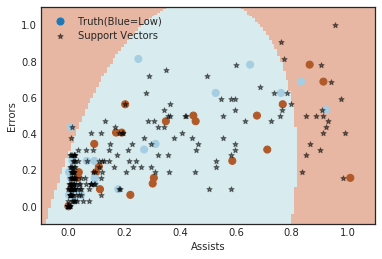

Accuracy: 0.53


In [63]:
## For the best case, plot the result and print the accuracy.
svc = SVC(C= 100, kernel='rbf', gamma=0.2)
svc.fit(X_train_scaled, y_train)

PlotSVMResult(svc, X_test_scaled, y_test, features, h=0.01)

y_pred = svc.predict(X_test_scaled)
print('Accuracy: %.2f' %accuracy_score(y_test, y_pred))

# 5. ROC curve

In [84]:
### Evaluate FPR(fall-out) and TPR(recall) for the best case from the above task.
print('confusion_matrix:[TP, FN, FP, TN ] =',confusion_matrix(y_test,  clf.best_estimator_.predict(X_test)).ravel())
recall=17/(17+11)
fallout=19/(19+6)
print('Recall(TPR):',recall)
print('Fallout(FPR):', fallout)

### Get the ROC curve and AUC value.

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test_scaled))


confusion_matrix:[TP, FN, FP, TN ] = [17 11 19  6]
Recall(TPR): 0.6071428571428571
Fallout(FPR): 0.76


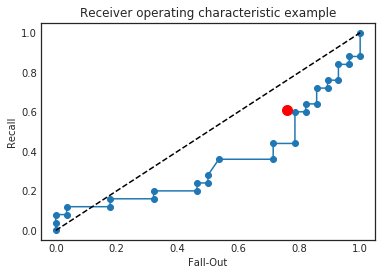

auc_value: 0.3457142857142857


In [85]:
### Plot the ROC curve (x: FPR, y: TPR, adding the y=x line.)
plt.plot(fpr, tpr, 'o-', label="SVM")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.show()
### Print the AUC value.
roc_auc = auc(fpr, tpr)
print('auc_value:',roc_auc)

In [79]:
### Plot the several curves with different hyperparameters(model=SVM).

svm1= SVC(C= 100, kernel='rbf', gamma=20)
svm1.fit(X_train_scaled, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
svm2= SVC(C= 100, kernel='linear', gamma=0.2)
svm2.fit(X_train_scaled, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

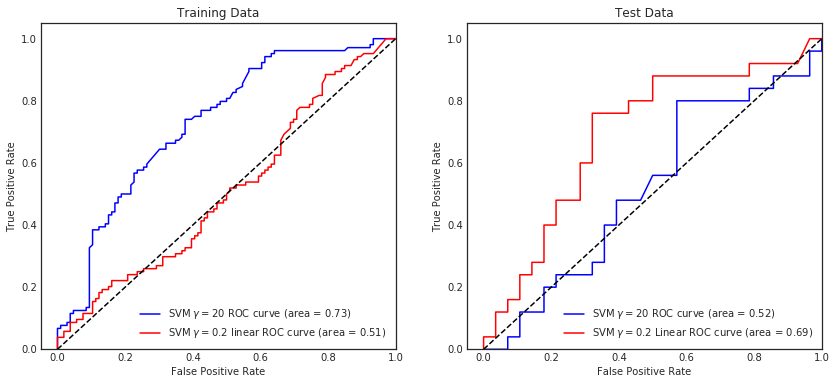

In [82]:
y_train_score1 = svm1.decision_function(X_train_scaled)
y_train_score2 = svm2.decision_function(X_train_scaled)

false_pos_rate1, true_pos_rate1, _ = roc_curve(y_train, y_train_score1)
roc_auc1 = auc(false_pos_rate1, true_pos_rate1)

false_pos_rate2, true_pos_rate2, _ = roc_curve(y_train, y_train_score2)
roc_auc2 = auc(false_pos_rate2, true_pos_rate2)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate1, true_pos_rate1, label='SVM $\gamma = 20$ ROC curve (area = %0.2f)' % roc_auc1, color='b')
ax1.plot(false_pos_rate2, true_pos_rate2, label='SVM $\gamma = 0.2$ linear ROC curve (area = %0.2f)' % roc_auc2, color='r')
ax1.set_title('Training Data')

y_test_score1 = svm1.decision_function(X_test_scaled)
y_test_score2 = svm2.decision_function(X_test_scaled)

false_pos_rate1, true_pos_rate1, _ = roc_curve(y_test, y_test_score1)
roc_auc1 = auc(false_pos_rate1, true_pos_rate1)

false_pos_rate2, true_pos_rate2, _ = roc_curve(y_test, y_test_score2)
roc_auc2 = auc(false_pos_rate2, true_pos_rate2)

ax2.plot(false_pos_rate1, true_pos_rate1, label='SVM $\gamma = 20$ ROC curve (area = %0.2f)' % roc_auc1, color='b')
ax2.plot(false_pos_rate2, true_pos_rate2, label='SVM $\gamma = 0.2$ Linear ROC curve (area = %0.2f)' % roc_auc2, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")